## Preliminary Exploratory Data Analysis

Dataset can be found here https://www.kaggle.com/datasets/nelakurthisudheer/dataset-for-predicting-watering-the-plants by Nelakurthi Sudheer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [3]:
df = pd.read_csv('soil_data.csv')
df.head()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,OFF
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,OFF


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Soil Moisture        100000 non-null  int64  
 1   Temperature          100000 non-null  int64  
 2   Soil Humidity        100000 non-null  int64  
 3   Time                 100000 non-null  int64  
 4   Air temperature (C)  23995 non-null   float64
 5   Wind speed (Km/h)    23995 non-null   float64
 6   Air humidity (%)     23995 non-null   float64
 7   Wind gust (Km/h)     23995 non-null   float64
 8   Pressure (KPa)       23995 non-null   float64
 9   ph                   2200 non-null    float64
 10  rainfall             2200 non-null    float64
 11  N                    2200 non-null    float64
 12  P                    2200 non-null    float64
 13  K                    2200 non-null    float64
 14  Status               100000 non-null  object 
dtypes: float64(10), in

In [5]:
df.shape

(100000, 15)

In [6]:
print("# of ON records: ", df[df['Status'] == 'ON'].shape[0])
print("# of OFF records: ", df[df['Status'] == 'OFF'].shape[0])

# of ON records:  53650
# of OFF records:  46350


In [7]:
#dropping all the null values of air temp
df = df.dropna(axis=0, subset=['Air temperature (C)'])
df = df.dropna(axis=0, subset=['Wind speed (Km/h)'])
df = df.dropna(axis=0, subset=['Air humidity (%)'])
df = df.dropna(axis=0, subset=['Wind gust (Km/h)'])
df = df.dropna(axis=0, subset=['Pressure (KPa)'])
print("# of ON records: ", df[df['Status'] == 'ON'].shape[0])
print("# of OFF records: ", df[df['Status'] == 'OFF'].shape[0])

# of ON records:  12973
# of OFF records:  11022


note: dataset is still balanced after removing null values from air temp

question: do we still want to keep columns with only 2200 rows? (ph, rainfall, N, P, K)

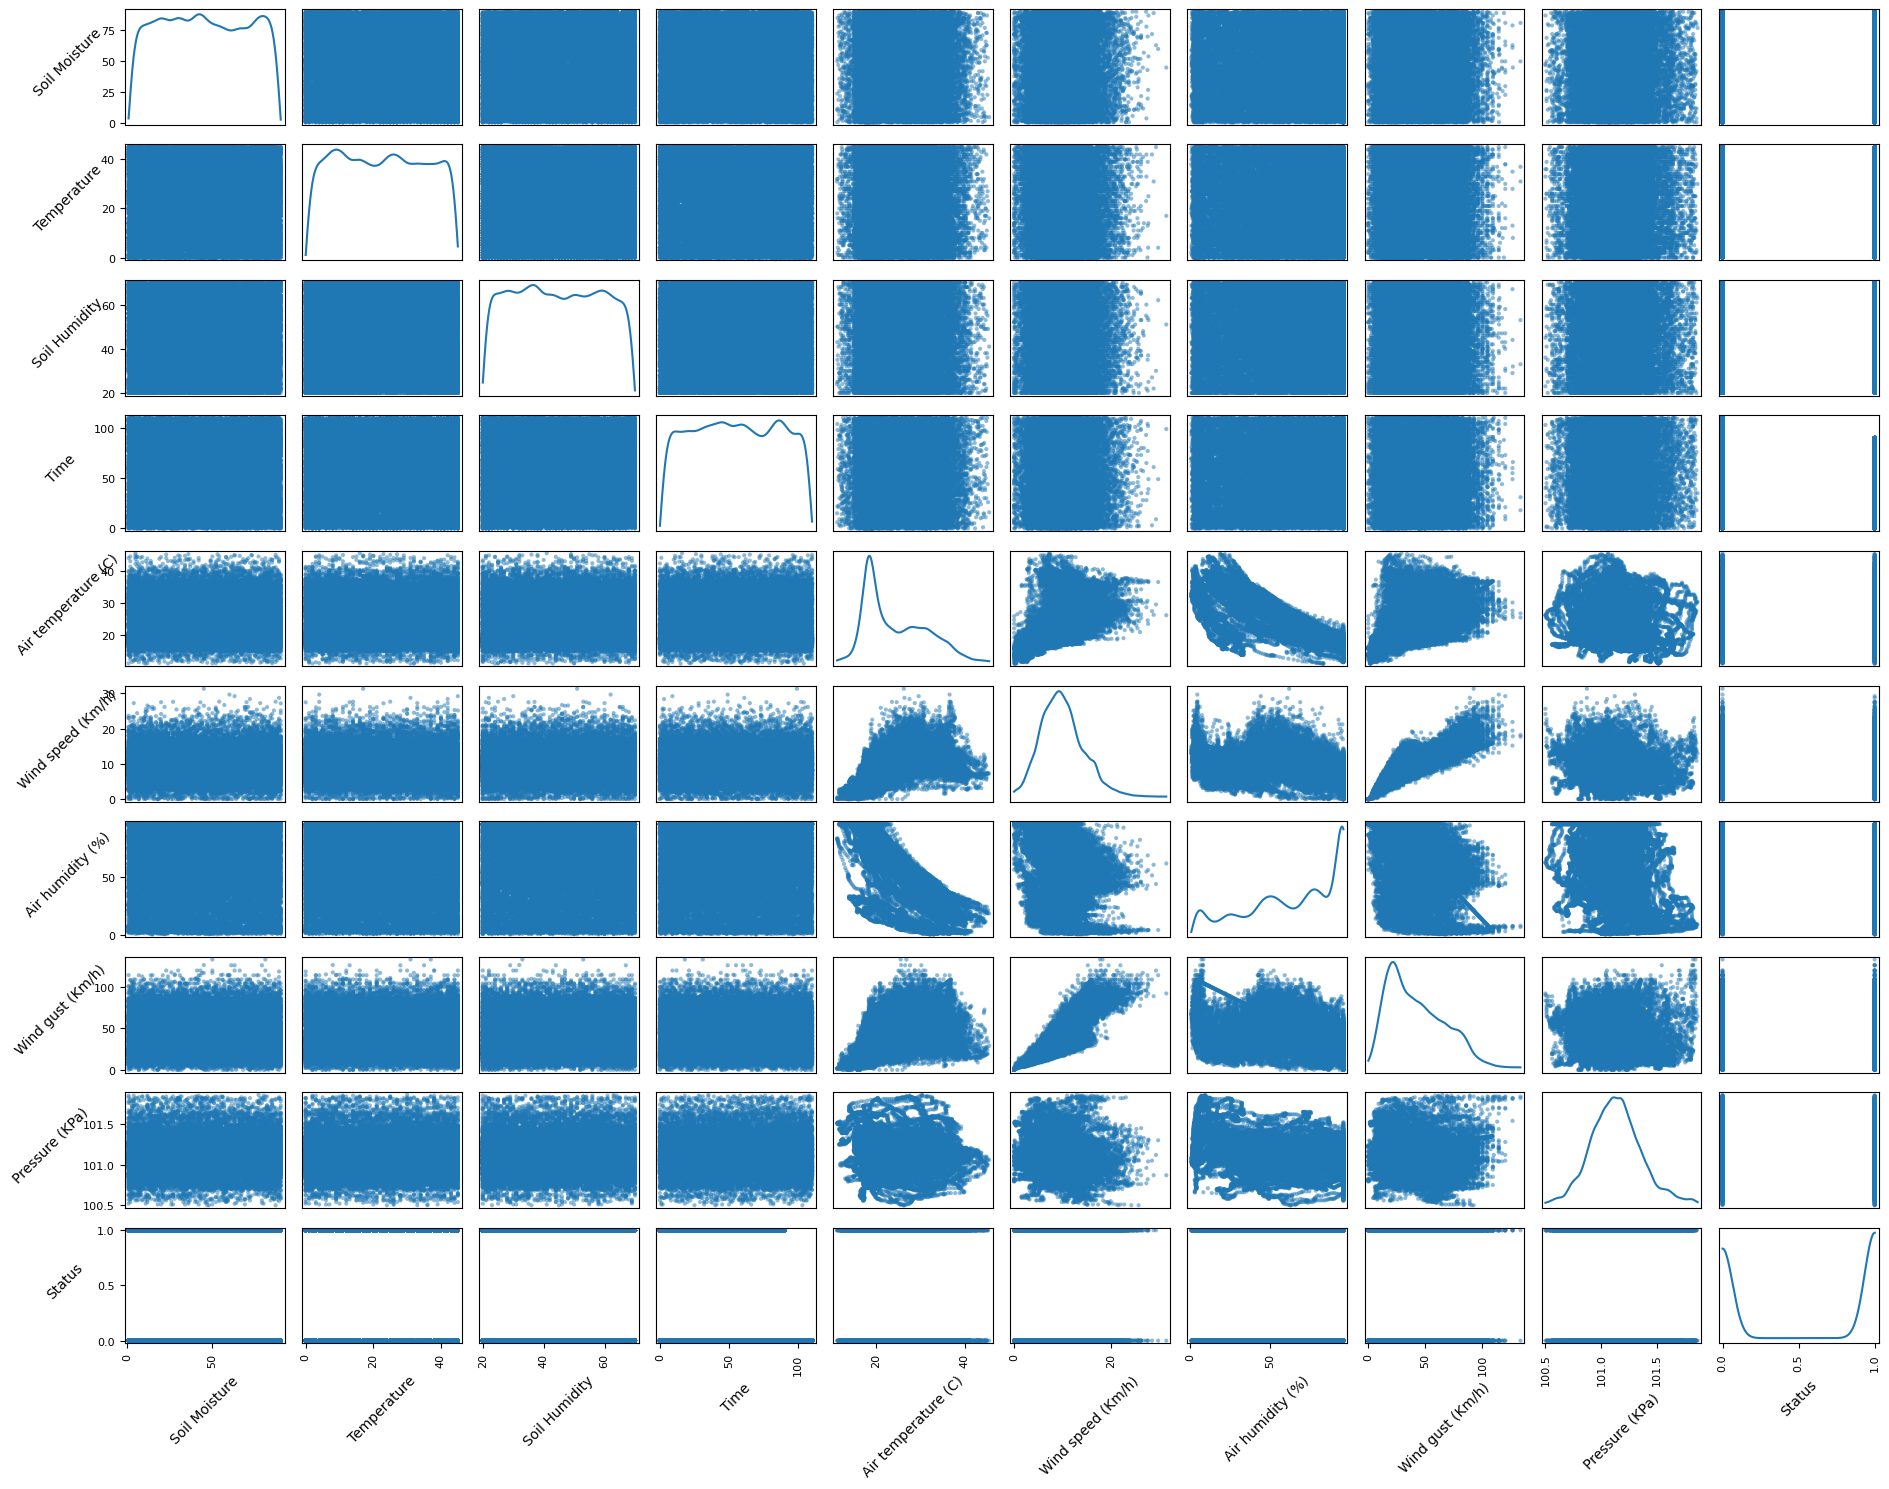

In [46]:
axes = scatter_matrix(df, alpha=0.5, diagonal='kde',figsize=(19, 15)) 

df['Status']= df['Status'].map({'OFF': 0, 'ON': 1})
corr = df.corr().to_numpy()

for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=45) 
    ax.set_ylabel(ax.get_ylabel(), rotation=45,labelpad=20) 
    
plt.tight_layout()
plt.show()

<Axes: >

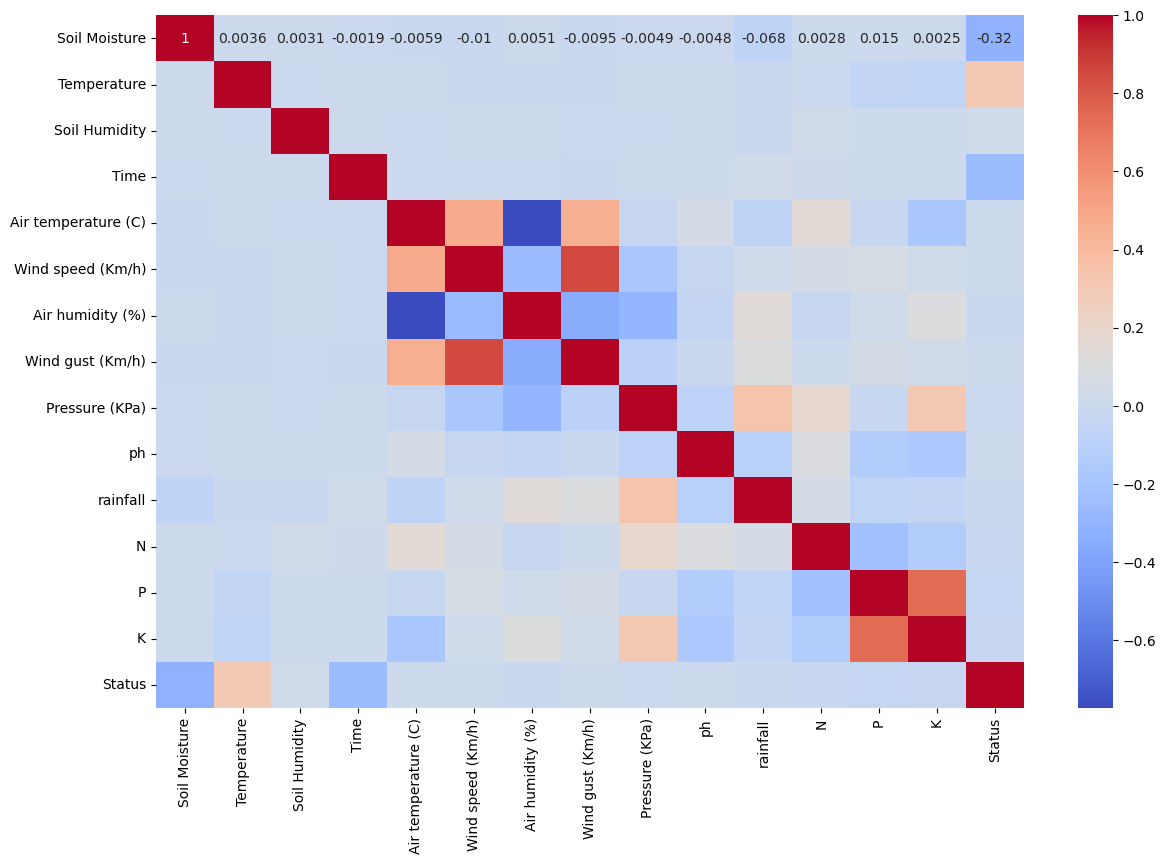

In [10]:
df = pd.read_csv('soil_data.csv')
df['Status']= df['Status'].map({'OFF': 0, 'ON': 1})
corr = df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Univariate Testing
Univariate testing only considers variables in *isolation*. 


In [12]:
df = pd.read_csv('soil_data.csv')
df = df.dropna(axis=0, subset=['Air temperature (C)'])\
    .drop(['N','P','K','rainfall','ph'], axis = 1) #dropped all columns with fewer than a 23995 records

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

X = df.drop(["Status"], axis = 1)
y = df["Status"]

feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05 #arbitrarily chosen
score_threshold = 5 #arbitrarily chosen

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]

In [14]:
summary_stats

,input_variable,p_value,chi2_score
0,Soil Moisture,0.000000e+00,37328.725341
1,Temperature,0.000000e+00,17891.049653
3,Time,0.000000e+00,27553.143467
2,Soil Humidity,2.436928e-15,62.675791
6,Air humidity (%),3.779211e-06,21.373694
4,Air temperature (C),3.908095e-02,4.257345
7,Wind gust (Km/h),6.351471e-02,3.443144
5,Wind speed (Km/h),1.616797e-01,1.958446
8,Pressure (KPa),9.925913e-01,0.000086


In [15]:
df["Time"].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110], dtype=int64)

In [16]:
print(f"Number of significant features: {len(selected_variables)}")
selected_variables

Number of significant features: 5


['Soil Moisture', 'Temperature', 'Time', 'Soil Humidity', 'Air humidity (%)']

## Recursive Feature Elimination with Cross-Validation (RFECV)
Iteratively removes features with weak relationships

Optimal number of features: 6


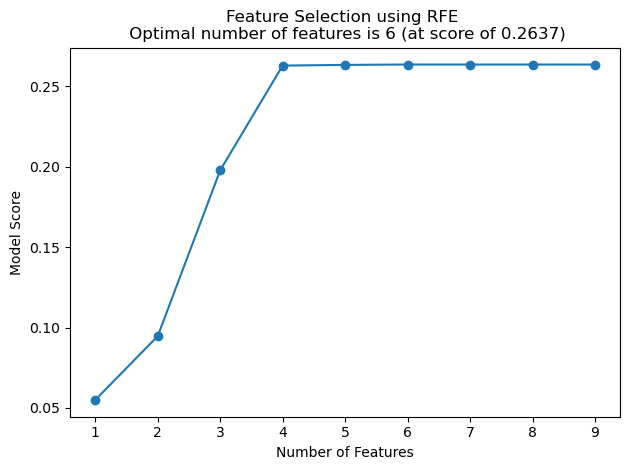

In [18]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

X = df.drop(["Status"], axis=1)
y = df["Status"].map({'OFF': 0, 'ON': 1})

regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X, y)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

X_new = X.loc[:, feature_selector.get_support()]

# Plotting the results
plt.plot(range(1, len(feature_selector.cv_results_['mean_test_score']) + 1),
         feature_selector.cv_results_['mean_test_score'], marker="o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(feature_selector.cv_results_['mean_test_score']), 4)})")
plt.tight_layout()
plt.show()

In [19]:
optimal_features = X.columns[feature_selector.get_support()]

print("Optimal features are:")
print(optimal_features.tolist())


Optimal features are:
['Soil Moisture', 'Temperature', 'Soil Humidity', 'Time', 'Air temperature (C)', 'Pressure (KPa)']


In [20]:
X_new

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Pressure (KPa)
0,54,22,70,21,19.52,101.50
1,12,20,40,104,19.49,101.50
2,34,26,35,62,19.47,101.51
3,7,44,44,93,19.54,101.51
4,50,38,23,92,19.61,101.51
...,...,...,...,...,...,...
26296,77,30,62,23,19.46,101.04
26297,33,35,24,63,19.90,101.04
26298,88,2,34,3,20.34,101.04
26299,61,45,60,97,20.70,101.05


In [21]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

X = df.drop(["Status"], axis=1)
y = df["Status"].map({'OFF': 0, 'ON': 1})

classifier = LogisticRegression(max_iter=1000)
feature_selector = RFECV(classifier, step=1, cv=5, scoring='accuracy')  # Use an appropriate scoring metric

fit = feature_selector.fit(X, y)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

optimal_features_rfecv = X.columns[feature_selector.get_support()]

print("RFECV Optimal features are:")
print(optimal_features_rfecv.tolist())


Optimal number of features: 5
RFECV Optimal features are:
['Soil Moisture', 'Temperature', 'Soil Humidity', 'Time', 'Pressure (KPa)']


In [22]:
# Drop the 'Time' column and create a temporary dataframe
temp_df = df.drop(['Time'], axis=1)

# Redo SelectKBest
X_temp = temp_df.drop(["Status"], axis=1)
y_temp = temp_df["Status"].map({'OFF': 0, 'ON': 1})

feature_selector_kbest = SelectKBest(chi2, k="all")
fit_kbest = feature_selector_kbest.fit(X_temp, y_temp)

p_values_temp = pd.DataFrame(fit_kbest.pvalues_)
scores_temp = pd.DataFrame(fit_kbest.scores_)
input_variable_names_temp = pd.DataFrame(X_temp.columns)
summary_stats_temp = pd.concat([input_variable_names_temp, p_values_temp, scores_temp], axis=1)
summary_stats_temp.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats_temp.sort_values(by="p_value", inplace=True)

selected_variables_kbest = summary_stats_temp.loc[
    (summary_stats_temp["chi2_score"] >= score_threshold) &
    (summary_stats_temp["p_value"] <= p_value_threshold)
]
selected_variables_kbest = selected_variables_kbest["input_variable"].tolist()
X_new_kbest = X_temp[selected_variables_kbest]

# Redo RFECV with Linear Regression
regressor = LinearRegression()
feature_selector_rfecv = RFECV(regressor)

fit_rfecv = feature_selector_rfecv.fit(X_temp, y_temp)

optimal_feature_count_rfecv = feature_selector_rfecv.n_features_
optimal_features_rfecv = X_temp.columns[feature_selector_rfecv.get_support()]

# Redo RFECV with Logistic Regression
classifier = LogisticRegression(max_iter=1000)
feature_selector_rfecv_logistic = RFECV(classifier, step=1, cv=5, scoring='accuracy')

fit_rfecv_logistic = feature_selector_rfecv_logistic.fit(X_temp, y_temp)

optimal_feature_count_rfecv_logistic = feature_selector_rfecv_logistic.n_features_
optimal_features_rfecv_logistic = X_temp.columns[feature_selector_rfecv_logistic.get_support()]

# Output the results
print(f"Optimal number of features with SelectKBest: {len(selected_variables_kbest)}")
print(f"Selected features with SelectKBest: {selected_variables_kbest}")
print(f"Optimal number of features with RFECV (Linear Regression): {optimal_feature_count_rfecv}")
print(f"Selected features with RFECV (Linear Regression): {optimal_features_rfecv.tolist()}")
print(f"Optimal number of features with RFECV (Logistic Regression): {optimal_feature_count_rfecv_logistic}")
print(f"Selected features with RFECV (Logistic Regression): {optimal_features_rfecv_logistic.tolist()}")


Optimal number of features with SelectKBest: 4
Selected features with SelectKBest: ['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air humidity (%)']
Optimal number of features with RFECV (Linear Regression): 6
Selected features with RFECV (Linear Regression): ['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air temperature (C)', 'Wind speed (Km/h)', 'Pressure (KPa)']
Optimal number of features with RFECV (Logistic Regression): 2
Selected features with RFECV (Logistic Regression): ['Soil Moisture', 'Temperature']


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# remove time and status columns
X_selected = df.drop(['Time', 'Status'], axis=1).apply(pd.to_numeric, errors='coerce')

X_selected = X_selected.fillna(X_selected.mean())
X_selected = X_selected.dropna()

# basic function which calculates VIF scores
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# iteratively remove highest vif score with the threshold of 10, if all below 10 then we can stop and return
vif_threshold = 10
while True:
    vif_data = calculate_vif(X_selected)
    max_vif = vif_data['VIF'].max()
    if max_vif > vif_threshold:
        feature_to_remove = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
        print(f"Removing feature '{feature_to_remove}' with VIF: {max_vif}")
        X_selected = X_selected.drop(columns=[feature_to_remove])
    else:
        break


# return the final scores and set of features to be used in training
print("Final VIF scores:")
print(vif_data)

Removing feature 'Pressure (KPa)' with VIF: 86.24729204529129
Removing feature 'Wind speed (Km/h)' with VIF: 25.9152009726623
Removing feature 'Air temperature (C)' with VIF: 12.03373426514228
Final VIF scores:
            feature       VIF
0     Soil Moisture  3.582071
1       Temperature  3.416768
2     Soil Humidity  6.740066
3  Air humidity (%)  3.943991
4  Wind gust (Km/h)  3.393525
